In [11]:
# import statements

from google.colab import files
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
import math

In [12]:
# uploading the training data
uploaded_train = files.upload()

Saving train_data.csv to train_data (1).csv


In [13]:
# reading data from dataset-1

df1 = pd.read_csv(io.BytesIO(uploaded_train['train_data.csv']))

dataset_2 = df1.to_numpy()
# dataset_2 = dataset_2.transpose()
print(dataset_2.shape)
# print(dataset_1[-1])

(2300, 2)


Visualization of the dataset-2

Text(0.5, 1.0, 'Scatter plot of dataset-2')

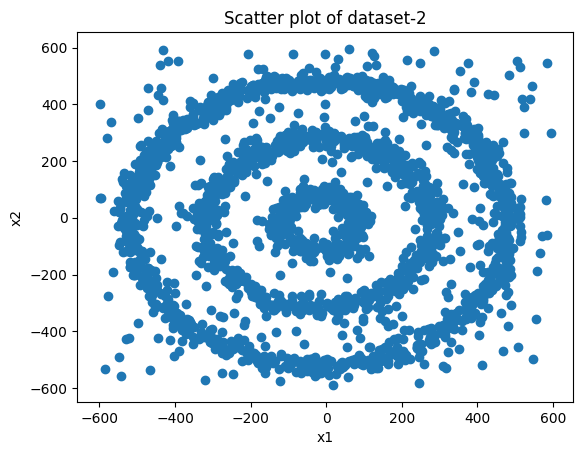

In [14]:
plt.scatter(dataset_2[:,0],dataset_2[:,1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter plot of dataset-2")

**FCM (Fuzzy C-Means) clustering**

In [15]:
class FCM:

    def __init__(self, c=2, m=2, max_iter=100, tol=1e-4):
        self.c = c
        self.m = m
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, data):
        # Random initialization of centroids
        self.centroids = np.random.rand(self.c, data.shape[1])

        # Membership matrix initialization
        self.membership = np.random.rand(data.shape[0], self.c)
        self.membership = self.membership / np.sum(self.membership, axis=1, keepdims=True)

        for i in range(self.max_iter):
            # Calculate the distance between each data point and each centroid
            distances = np.sqrt(np.sum((data[:, np.newaxis] - self.centroids)**2, axis=2))

            # Calculate the membership values of each data point in each cluster
            membership_new = 1 / distances**(2/(self.m-1))
            membership_new = membership_new / np.sum(membership_new, axis=1, keepdims=True)

            # Update centroids
            self.centroids = np.dot(membership_new.T, data) / np.sum(membership_new, axis=0, keepdims=True).T

            # Check for convergence
            if np.allclose(self.membership, membership_new, rtol=0, atol=self.tol):
                break

            self.membership = membership_new

        return self

    def predict(self, data):
        # Calculate the distance between each data point and each centroid
        distances = np.sqrt(np.sum((data[:, np.newaxis] - self.centroids)**2, axis=2))

        # Calculate the membership values of each data point in each cluster
        membership = 1 / distances**(2/(self.m-1))
        membership = membership / np.sum(membership, axis=1, keepdims=True)

        # Determine the cluster with the highest membership value for each data point
        labels = np.argmax(membership, axis=1)

        return labels


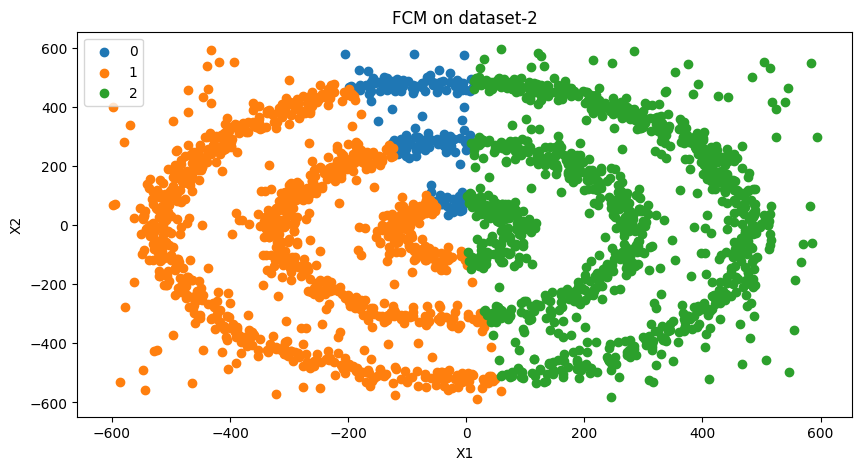

In [16]:
fcm = FCM(c=3,max_iter = 10000)

fcm.fit(dataset_2)

label = fcm.predict(dataset_2)

x1 = dataset_2[:,0]
x2 = dataset_2[:,1]

i_label_0 = np.where(label == 0)
i_label_1 = np.where(label == 1)
i_label_2 = np.where(label == 2)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

ax.scatter(x1[i_label_0], x2[i_label_0],label="0")
ax.scatter(x1[i_label_1], x2[i_label_1],label="1")
ax.scatter(x1[i_label_2], x2[i_label_2],label="2")

ax.set_title("FCM on dataset-2")

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()

plt.show()

